# CMSC471 - Artificial Intelligence - Spring 2020
# <font color="blue"> Assignment 5: Classification and Regression Using NN in Tensorflow</font>

Adam Hereth WU63616

## Overview and Learning Objectives

In Part I of this assignment, you are going to build a neural network for binary classification. 

In Part II, you will build a NN for regression.

<b>Note: </b>As you work through this assignment, you are recommended to check the textbook examples, notebooks and tensorflow documentations.

Pedagogically, this assignment will help you:
- better understand classification and regression using Neural Networks.

- practice implementing NNs in Tensorflow and Keras.

## Part I - Classification Using NN in Tensorflow

You're going to build a binary classifier NN to predict disease, i.e. "diagnosis".

The first thing to do is downloading [the breast cancer dataset](https://github.com/fereydoonvafaei/CMSC471-Spring2020/blob/master/Assignment-5/breast_cancer.csv) and save it in the same working directory as your notebook.

Read the feature specifications in [Kaggle page](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/data) to learn more about the data.

## <font color="red"> Required Coding

In [ ]:
# Import necessary modules from python, tensorflow and keras
# NOTE: As you work through the notebook, keep adding any required module here if necessary
...
import pandas as pd
import numpy as np
import os

import pandas
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [ ]:
print("tf Version: ", tf.__version__)
print("Eager Execution mode: ", tf.executing_eagerly())

tf Version:  2.2.0
Eager Execution mode:  True


> Next, load the data with pandas. The data (csv file) should be stored in the same working directory as your notebook.

In [ ]:
# Load dataset using pd
...
url = 'https://raw.githubusercontent.com/fereydoonvafaei/CMSC471-Spring2020/master/Assignment-5/breast_cancer.csv'
df1 = pd.read_csv(url)
data = df1
# Show the first five rows
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Preprocessing

> Check if there is any null or na in the data.

In [ ]:
print(data.isnull().sum())
data.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

> Also, the first column `id` doesn't seem to provide any useful info to ML model, so drop it.

In [ ]:
len(data['id'].unique())

569

In [ ]:
# drop "id"
...
data.drop('id', axis=1, inplace=True)
print(data)

    diagnosis  radius_mean  ...  symmetry_worst  fractal_dimension_worst
0           M        17.99  ...          0.4601                  0.11890
1           M        20.57  ...          0.2750                  0.08902
2           M        19.69  ...          0.3613                  0.08758
3           M        11.42  ...          0.6638                  0.17300
4           M        20.29  ...          0.2364                  0.07678
..        ...          ...  ...             ...                      ...
564         M        21.56  ...          0.2060                  0.07115
565         M        20.13  ...          0.2572                  0.06637
566         M        16.60  ...          0.2218                  0.07820
567         M        20.60  ...          0.4087                  0.12400
568         B         7.76  ...          0.2871                  0.07039

[569 rows x 31 columns]


> Now, you can extract features and labels from `data`. Your classifier should attempt to predict `diagnosis` so that is your target/label column.

In [ ]:
# Organize data to feature vector X and label vector y
X = data.drop(columns = ['diagnosis'])
y = data['diagnosis']

In [ ]:
print("Features shape: ", X.shape)
print("Labels shape: ", y.shape)

Features shape:  (569, 30)
Labels shape:  (569,)


> Your `X` dataframe now only contains features, hence has 30 columns whereas `y` has now become a 1D vector containing labels only. Notice that `y` has 569 labels equal to the number of data records in the feature vector.

In [ ]:
# X should no longer contain the diagnosis which is target/label column - i.e. the column to be predicted
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# y should only contain diagnosis - target/label column
y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [ ]:
y.unique()

array(['M', 'B'], dtype=object)

> The two classes (aka labels) here are `M` and `B` representing `malignant` and `benign` which refers to the tumors you are going to classify. You need to represent them by `1` and `0` respectively. In other words, to use sklearn classifiers and score metrics, you need to convert the categorical lables.

In [ ]:
# Encoding categorical labels M and B to 1 and 0
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

> When you have multiple features with different scales/ranges, you should consider standardizing them. There are different ways to standardize and to normalize the feature vector. One convenient way is using scikit-learn modules.

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [ ]:
# Split the data to training set and testing set
...
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30)
# Check the shapes of X_train, X_test, y_train, y_test
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (398, 30)
y_train shape:  (398,)
X_test shape:  (171, 30)
y_test shape:  (171,)


### Building NN for Binary Classification

> Now, you should build a binary classifier NN that can predict diagnosis.

> You can begin with a simple neural network with a couple of hidden layers, and increase number of hidden layers and neurons as needed. You may also use callback and early stopping to find the optimal number of epochs, but it's possible to obtain the minimum required accuracy (0.97) within 20 epochs only.

> **Hint-1**: During training, despite some variations, you should see a clear trend of descending loss and increasing accuracy; otherwise, your model has not been developed properly.

> **Hint-2**: Every time you want to train your network, you should start running the following cell to start with a fresh NN and to clear the previously trained weights. Otherwise, your results are not accurate.

In [ ]:
# Build a sequential NN with appropriate layers for binary classification of diagnosis
# Use ReLU for all hidden layers

layer_0 = tf.keras.layers.Dense(units=1, input_shape=[30], activation='relu')
nn_clf = tf.keras.Sequential([
    # Add layers accordingly
    layer_0
    ])


In [ ]:
nn_clf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 31        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


> Next, you should compile your `nn_clf`.

In [ ]:
# Compile nn_clf with loss='binary_crossentropy' and metrics=['accuracy']
...
nn_clf.compile(optimizer=keras.optimizers.Adadelta(learning_rate=140), loss='binary_crossentropy', metrics=['accuracy'])

> Train the model using `fit()` method.

In [ ]:
# Train nn_clf on X_train and y_train with 20 epochs
nn_clf_history = nn_clf.fit(X_train, y_train, epochs=20)

Epoch 1/20
13/13 [==============================] - 0s 1ms/step - loss: 1.7506 - accuracy: 0.8467
Epoch 2/20
13/13 [==============================] - 0s 1ms/step - loss: 0.4619 - accuracy: 0.9472
Epoch 3/20
13/13 [==============================] - 0s 1ms/step - loss: 0.3021 - accuracy: 0.9598
Epoch 4/20
13/13 [==============================] - 0s 1ms/step - loss: 0.2124 - accuracy: 0.9774
Epoch 5/20
13/13 [==============================] - 0s 1ms/step - loss: 0.2482 - accuracy: 0.9724
Epoch 6/20
13/13 [==============================] - 0s 1ms/step - loss: 0.2101 - accuracy: 0.9799
Epoch 7/20
13/13 [==============================] - 0s 1ms/step - loss: 1.3110 - accuracy: 0.8995
Epoch 8/20
13/13 [==============================] - 0s 1ms/step - loss: 0.2425 - accuracy: 0.9774
Epoch 9/20
13/13 [==============================] - 0s 1ms/step - loss: 0.2043 - accuracy: 0.9824
Epoch 10/20
13/13 [==============================] - 0s 1ms/step - loss: 0.4026 - accuracy: 0.9698
Epoch 11/20
13/13 [

> Next, plot the history of train.

(0.0, 1.0)

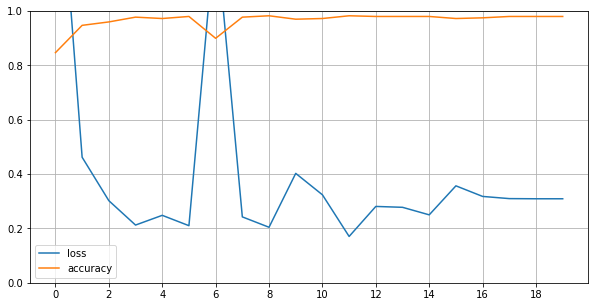

In [ ]:
pd.DataFrame(nn_clf_history.history).plot(figsize=(10, 5))
plt.grid(True)

# Set the xticks - label locations
plt.xticks(np.arange(0, 20, step=2))  

# set the y-axis range to [0-1]
plt.gca().set_ylim(0, 1) 

> To evaluate the model, you use `evaluate()` method.

> <font color='red'>**Minimum Accuracy Requirement**</font>: Your accuracy on `X_test` and `y_test` must be at least **0.97**. Otherwise, your notebook will get NO CREDIT for this part, so you must fine-tune your `nn_clf` accordingly.

In [ ]:
# Evaluate the model on X_test and y_test
loss, accuracy = nn_clf.evaluate(X_test, y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.2820 - accuracy: 0.9708


In [ ]:
# Minimum Required Accuracy: 0.97
round(accuracy, 2)

0.97

## Part II - Regression Using NN in Tensorflow

In this part, you build a regression model for prediction of video game sales using NN.

You can download the dataset directly from [here](https://github.com/fereydoonvafaei/CMSC471-Spring2020/blob/master/Assignment-5/video-games.csv).

The description of the dataset you're going to work on can be seen [here](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings). You are going to use the features to predict video game sales in Europe `EU_Sales`.

Follow the instructions for loading the data, and preprocessing very carefully. Even though preprocessing has 10 points only, if you don't do it correctly, your whole results would be wrong.

## <font color="red"> Required Coding

In [ ]:
# Load the data as a dataframe using pandas
game_data = pd.read_csv('https://raw.githubusercontent.com/fereydoonvafaei/CMSC471-Spring2020/master/Assignment-5/video-games.csv')
print(game_data.shape)
game_data.head()

(16719, 16)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Drop NAs
game_data = game_data.dropna()
print(game_data.shape)
game_data.head()

(6825, 16)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [ ]:
# Drop "Name" column as it does not provide any useful info
game_data.drop('Name', axis=1, inplace=True)
print(game_data.shape)
game_data.head()

(6825, 15)


,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [ ]:
# Drop "Global_Sales" column as it is redundant feature - it's just sum of regional and other sales
game_data.drop('Global_Sales', axis=1, inplace=True)
print(game_data.shape)
game_data.head()

(6825, 14)


,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,76.0,51.0,8,322.0,Nintendo,E
2,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,80.0,73.0,8,192.0,Nintendo,E
6,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,58.0,41.0,6.6,129.0,Nintendo,E


In [ ]:
# Get feature vector X_reg (all columns but "EU_Sales") and target label y_reg as "EU_Sales"
X_reg = game_data.drop(columns=['EU_Sales'])
y_reg = game_data['EU_Sales']

In [ ]:
# Print X_reg shape and head
print(X_reg.shape)
X_reg.head()

(6825, 13)


,Platform,Year_of_Release,Genre,Publisher,NA_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii,2006.0,Sports,Nintendo,41.36,3.77,8.45,76.0,51.0,8,322.0,Nintendo,E
2,Wii,2008.0,Racing,Nintendo,15.68,3.79,3.29,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii,2009.0,Sports,Nintendo,15.61,3.28,2.95,80.0,73.0,8,192.0,Nintendo,E
6,DS,2006.0,Platform,Nintendo,11.28,6.50,2.88,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii,2006.0,Misc,Nintendo,13.96,2.93,2.84,58.0,41.0,6.6,129.0,Nintendo,E


In [ ]:
# Using pandas.get_dummies() create dummy variables for categorical features of X_reg
X_reg = pandas.get_dummies(X_reg)
print(X_reg.shape)
X_reg.head()

(6825, 1683)


,Year_of_Release,NA_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Count,Platform_3DS,Platform_DC,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Publisher_10TACLE Studios,Publisher_1C Company,Publisher_2D Boy,Publisher_3DO,...,Developer_Wizarbox,Developer_WorkJam,Developer_Wow Entertainment,Developer_Xpec,Developer_Yacht Club Games,Developer_Yager,Developer_Yuke's,"Developer_Z-Axis, Ltd.",Developer_Zed Two Limited,Developer_Zen Studios,Developer_Zener Works,Developer_ZeniMax Media,Developer_Zerodiv,Developer_Zindagi Games,Developer_Zipper Interactive,Developer_Zoe Mode,"Developer_Zoe Mode, HB Studios Multimedia",Developer_Zombie,Developer_Zombie Studios,Developer_Zono Inc.,Developer_Zoo Games,Developer_Zoom,Developer_ZootFly,Developer_h.a.n.d. Inc.,Developer_iNiS,Developer_id Software,"Developer_id Software, Nerve Software","Developer_id Software, Raven Software",Developer_n-Space,Developer_neo Software,Developer_odenis studio,Developer_syn Sophia,Developer_zSlide,Rating_AO,Rating_E,Rating_E10+,Rating_K-A,Rating_M,Rating_RP,Rating_T
0,2006.0,41.36,3.77,8.45,76.0,51.0,322.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2008.0,15.68,3.79,3.29,82.0,73.0,709.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,2009.0,15.61,3.28,2.95,80.0,73.0,192.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,2006.0,11.28,6.50,2.88,89.0,65.0,431.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7,2006.0,13.96,2.93,2.84,58.0,41.0,129.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


> <b>Note:</b> The output of the following cells is provided to you for your reference. All the following cells depend on the correctness of your preprocessing steps and can be verified by these outputs.

In [ ]:
# Normalize X_reg using mean() and std()  NOTE: The output is provided for your reference.
X_reg = (X_reg - X_reg.mean())/X_reg.std()
print(X_reg.shape)
X_reg.head()

(6825, 1683)


,Year_of_Release,NA_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Count,Platform_3DS,Platform_DC,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Publisher_10TACLE Studios,Publisher_1C Company,Publisher_2D Boy,Publisher_3DO,...,Developer_Wizarbox,Developer_WorkJam,Developer_Wow Entertainment,Developer_Xpec,Developer_Yacht Club Games,Developer_Yager,Developer_Yuke's,"Developer_Z-Axis, Ltd.",Developer_Zed Two Limited,Developer_Zen Studios,Developer_Zener Works,Developer_ZeniMax Media,Developer_Zerodiv,Developer_Zindagi Games,Developer_Zipper Interactive,Developer_Zoe Mode,"Developer_Zoe Mode, HB Studios Multimedia",Developer_Zombie,Developer_Zombie Studios,Developer_Zono Inc.,Developer_Zoo Games,Developer_Zoom,Developer_ZootFly,Developer_h.a.n.d. Inc.,Developer_iNiS,Developer_id Software,"Developer_id Software, Nerve Software","Developer_id Software, Raven Software",Developer_n-Space,Developer_neo Software,Developer_odenis studio,Developer_syn Sophia,Developer_zSlide,Rating_AO,Rating_E,Rating_E10+,Rating_K-A,Rating_M,Rating_RP,Rating_T
0,-0.341176,42.346639,12.886767,31.004904,0.413014,1.147975,0.250716,-0.15243,-0.045334,-0.270063,-0.189656,-0.231777,-0.324695,-0.149895,-0.44777,-0.356319,-0.190483,-0.246165,-0.132631,3.639573,-0.114938,-0.37917,-0.300404,-0.154431,-0.560105,-0.194169,-0.242123,-0.244150,-0.250487,-0.132631,-0.305018,-0.341257,-0.380685,-0.213283,2.497324,-0.201761,-0.012105,-0.01712,-0.012105,-0.046929,...,-0.012105,-0.012105,-0.027075,-0.03204,-0.020969,-0.024214,-0.084153,-0.046929,-0.012105,-0.012105,-0.012105,-0.01712,-0.020969,-0.012105,-0.034254,-0.034254,-0.012105,-0.012105,-0.024214,-0.01712,-0.012105,-0.012105,-0.01712,-0.029661,-0.024214,-0.034254,-0.012105,-0.020969,-0.043682,-0.012105,-0.012105,-0.01712,-0.012105,-0.012105,1.509226,-0.397162,-0.012105,-0.515485,-0.012105,-0.730971
2,0.133743,15.800856,12.956315,11.884655,0.845647,2.292368,0.909519,-0.15243,-0.045334,-0.270063,-0.189656,-0.231777,-0.324695,-0.149895,-0.44777,-0.356319,-0.190483,-0.246165,-0.132631,3.639573,-0.114938,-0.37917,-0.300404,-0.154431,-0.560105,-0.194169,-0.242123,-0.244150,-0.250487,-0.132631,3.278020,-0.341257,-0.380685,-0.213283,-0.400370,-0.201761,-0.012105,-0.01712,-0.012105,-0.046929,...,-0.012105,-0.012105,-0.027075,-0.03204,-0.020969,-0.024214,-0.084153,-0.046929,-0.012105,-0.012105,-0.012105,-0.01712,-0.020969,-0.012105,-0.034254,-0.034254,-0.012105,-0.012105,-0.024214,-0.01712,-0.012105,-0.012105,-0.01712,-0.029661,-0.024214,-0.034254,-0.012105,-0.020969,-0.043682,-0.012105,-0.012105,-0.01712,-0.012105,-0.012105,1.509226,-0.397162,-0.012105,-0.515485,-0.012105,-0.730971
3,0.371202,15.728496,11.182831,10.624793,0.701436,2.292368,0.029412,-0.15243,-0.045334,-0.270063,-0.189656,-0.231777,-0.324695,-0.149895,-0.44777,-0.356319,-0.190483,-0.246165,-0.132631,3.639573,-0.114938,-0.37917,-0.300404,-0.154431,-0.560105,-0.194169,-0.242123,-0.244150,-0.250487,-0.132631,-0.305018,-0.341257,-0.380685,-0.213283,2.497324,-0.201761,-0.012105,-0.01712,-0.012105,-0.046929,...,-0.012105,-0.012105,-0.027075,-0.03204,-0.020969,-0.024214,-0.084153,-0.046929,-0.012105,-0.012105,-0.012105,-0.01712,-0.020969,-0.012105,-0.034254,-0.034254,-0.012105,-0.012105,-0.024214,-0.01712,-0.012105,-0.012105,-0.01712,-0.029661,-0.024214,-0.034254,-0.012105,-0.020969,-0.043682,-0.012105,-0.012105,-0.01712,-0.012105,-0.012105,1.509226,-0.397162,-0.012105,-0.515485,-0.012105,-0.730971
6,-0.341176,11.252514,22.380122,10.365410,1.350385,1.876225,0.436270,-0.15243,-0.045334,3.702302,-0.189656,-0.231777,-0.324695,-0.149895,-0.44777,-0.356319,-0.190483,-0.246165,-0.132631,-0.274717,-0.114938,-0.37917,-0.300404,-0.154431,-0.560105,-0.1

In [ ]:
# Split the data to train and test with ratio of 80/20 for train/test respectively
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.20)
print(X_reg_train.shape)
print(y_reg_train.shape)
print(X_reg_test.shape)
print(y_reg_test.shape)

(5460, 1683)
(5460,)
(1365, 1683)
(1365,)


### Building NN for Regression

> You are recommended to try different architectures (different number of hidden layers and neurons) to get the desired loss. You may start with a couple of hidden layers and a few neurons and add accordingly until you hit below the maximum acceptable loss.

In [ ]:
# Build a sequential NN with appropriate layers for regression to predict EU_Sales
# Use ReLU for all hidden layers

layer_1 = tf.keras.layers.Dense(units=500, input_shape=[1683], activation='relu')
layer_2 = tf.keras.layers.Dense(30, activation='relu')
layer_3 = tf.keras.layers.Dense(20, activation='relu')
layer_4 = tf.keras.layers.Dense(10, activation='relu')
layer_5 = tf.keras.layers.Dense(1, activation='relu')
nn_reg = tf.keras.Sequential([
    # Add layers accordingly
    layer_1, layer_2, layer_3, layer_4, layer_5
    ])

In [ ]:
nn_reg.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               842000    
_________________________________________________________________
dense_2 (Dense)              (None, 30)                15030     
_________________________________________________________________
dense_3 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 857,871
Trainable params: 857,871
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile nn_reg: set both loss and metric to 'mse',
# and set the optimizer to 'RMSprop' with a learning rate of 0.001

# For this regression task, loss and metrics are the same
nn_reg.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001), loss='mse', metrics=['mse'])
#opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
#nn_reg.compile(optimizer=, loss='mse', metrics=['mse'])

In [ ]:
# Fit the network on X_reg_train and y_reg_train with 20 epochs
nn_reg_history = nn_reg.fit(X_reg_train, y_reg_train, epochs=20)

Epoch 1/20
171/171 [==============================] - 2s 10ms/step - loss: 0.2013 - mse: 0.2013
Epoch 2/20
171/171 [==============================] - 2s 9ms/step - loss: 0.1298 - mse: 0.1298
Epoch 3/20
171/171 [==============================] - 2s 9ms/step - loss: 0.1273 - mse: 0.1273
Epoch 4/20
171/171 [==============================] - 2s 9ms/step - loss: 0.0943 - mse: 0.0943
Epoch 5/20
171/171 [==============================] - 2s 9ms/step - loss: 0.0991 - mse: 0.0991
Epoch 6/20
171/171 [==============================] - 2s 9ms/step - loss: 0.0798 - mse: 0.0798
Epoch 7/20
171/171 [==============================] - 2s 9ms/step - loss: 0.0779 - mse: 0.0779
Epoch 8/20
171/171 [==============================] - 2s 9ms/step - loss: 0.0699 - mse: 0.0699
Epoch 9/20
171/171 [==============================] - 2s 9ms/step - loss: 0.0662 - mse: 0.0662
Epoch 10/20
171/171 [==============================] - 2s 9ms/step - loss: 0.0621 - mse: 0.0621
Epoch 11/20
171/171 [===========================

(0.0, 1.0)

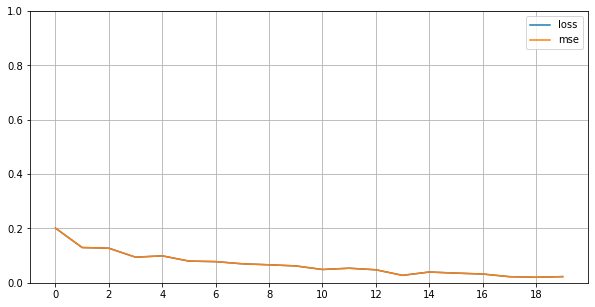

In [ ]:
pd.DataFrame(nn_reg_history.history).plot(figsize=(10, 5))
plt.grid(True)

# Set the xticks - label locations
plt.xticks(np.arange(0, 20, step=2))  

# set the y-axis range to [0-1]
plt.gca().set_ylim(0, 1) 

> <font color='red'>**Maximum Acceptable MSE Loss Requirement**</font>: The MSE loss of your model evaluated on `X_reg_test` and `y_reg_test` should not exceed **0.20**. Otherwise, your notebook will get NO CREDIT for this part, so you must fine-tune your `nn_reg` accordingly.

In [ ]:
# Evaluate the model on X_reg_test, y_reg_test
mse, mse = nn_reg.evaluate(X_reg_test, y_reg_test)

43/43 [==============================] - 0s 3ms/step - loss: 0.1426 - mse: 0.1426


In [ ]:
# Maximum acceptable mse loss: 0.20
round(mse, 2)

0.14